In [1]:
import pandas as pd 
import numpy as np

import matplotlib as mpl #Used for controlling color import matplotlib.colors #Used for controlling color as well import matplotlib.pyplot as plt import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns;# sns.set()

import scipy.signal as sg 
from scipy.signal import argrelextrema
from scipy import stats

import xarray as xr

import os
import glob

import time 
from math import *

import matplotlib.ticker as mticker

from datetime import datetime,timezone 
import dateutil.tz as tz

from pysolar import solar

import math

from datetime import datetime, timedelta
#from scipy.interpolate import spline
from scipy.stats import kendalltau

#import pymannkendall as mk
from sklearn.metrics import r2_score

from scipy.stats import pearsonr


import itertools
import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib.iotools import read_tmy3
from matplotlib.colors import LogNorm

In [2]:
df_spn = pd.read_csv('/Users/svisaga/OneDrive - UW-Madison/hsrl_cirrus_pbl_files/all/scatterplots/spn1_pyranometer_manilaobservatory_5min_2019.csv')
df_spn['Datetime_LT'] = pd.to_datetime(df_spn['Datetime_LT'])
df_spn

,Unnamed: 0,yr,mon,day,hour,minute,ss,CMP22_Total_Solar,SPN1_Total_Solar,SPN1_Diff_Solar,...,lon,elevation,Datetime,Datetime_LT,sza,cos(SZA),CM_cor,F_down/cos(SZA),F_down_direct/cos(SZA),F_down_diffuse/cos(SZA)
0,6,2019,6,25,13,50,0,-0.853940,-53.457400,-6.372900,...,121.07667,0,2019-06-25 13:50:00+00:00,2019-06-25 21:50:00+08:00,130.717442,-0.652329,1.309063,81.948505,72.179051,9.769454
1,7,2019,6,25,13,55,0,-0.765148,-28.557200,41.209000,...,121.07667,0,2019-06-25 13:55:00+00:00,2019-06-25 21:55:00+08:00,131.485781,-0.662434,1.155055,43.109491,105.317937,-62.208446
2,8,2019,6,25,14,0,0,-1.016177,-42.069500,-7.152800,...,121.07667,0,2019-06-25 14:00:00+00:00,2019-06-25 22:00:00+08:00,132.235256,-0.672176,1.511772,62.587003,51.945747,10.641256
3,9,2019,6,25,14,5,0,-0.927385,-46.291200,-6.292300,...,121.07667,0,2019-06-25 14:05:00+00:00,2019-06-25 22:05:00+08:00,132.964957,-0.681551,1.360698,67.920383,58.688057,9.232325
4,11,2019,6,25,14,15,0,-1.238706,-49.020600,-74.767800,...,121.07667,0,2019-06-25 14:15:00+00:00,2019-06-25 22:15:00+08:00,134.361254,-0.699180,1.771655,70.111557,-36.824851,106.936408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48789,74189,2020,11,30,8,40,0,-0.034900,39.556039,36.962338,...,121.07667,0,2020-11-30 08:40:00+00:00,2020-11-30 16:40:00+08:00,80.948044,0.157330,-0.221829,251.420766,16.485731,234.935035
48790,74190,2020,11,30,8,50,0,-0.013013,15.456426,14.209092,...,121.07667,0,2020-11-30 08:50:00+00:00,2020-11-30 16:50:00+08:00,83.113352,0.119905,-0.108528,128.905081,10.402650,118.502431
48791,74191,2020,11,30,9,0,0,-0.014129,10.299898,9.246458,...,121.07667,0,2020-11-30 09:00:00+00:00,2020-11-30 17:00:00+08:00,85.273627,0.082397,-0.171478,125.002938,12.784893,112.218045
48792,74192,2020,11,30,9,10,0,0.000867,5.572066,4.472893,...,121.07667,0,2020-11-30 09:10:00+00:00,2020-11-30 17:10:00+08:00,87.403755,0.045298,0.019145,123.010405,24.265644,98.744761


In [3]:
df_cod = pd.read_csv('/Users/svisaga/OneDrive - UW-Madison/hsrl_cirrus_pbl_files/02_cirrus_stat_figures/2019_cirrus_v2025_no50lcfilter.csv')
df_cod['Datetime_LT'] = pd.to_datetime(df_cod['Datetime_LT'])#.dt.tz_localize('Asia/Manila')
df_cod['Datetime_UTC'] = df_cod['Datetime_LT'].dt.tz_convert('UTC')

df_cod['LC'] = df_cod['low_cld']
df_cod = df_cod[['year', 'month_LT','day_LT','hour_LT','Datetime_UTC', 'Datetime_LT','LC','od_mean','season','cld_top', 'cld_bot']]
df_cod['cld_tck'] = df_cod['cld_top'] - df_cod['cld_bot']
df_cod

,year,month_LT,day_LT,hour_LT,Datetime_UTC,Datetime_LT,LC,od_mean,season,cld_top,cld_bot,cld_tck
0,2019,1,1,8,2019-01-01 00:00:00+00:00,2019-01-01 08:00:00+08:00,Y,NaN,DJF,NaN,NaN,NaN
1,2019,1,1,8,2019-01-01 00:05:00+00:00,2019-01-01 08:05:00+08:00,Y,NaN,DJF,NaN,NaN,NaN
2,2019,1,1,8,2019-01-01 00:10:00+00:00,2019-01-01 08:10:00+08:00,Y,NaN,DJF,NaN,NaN,NaN
3,2019,1,1,8,2019-01-01 00:15:00+00:00,2019-01-01 08:15:00+08:00,Y,NaN,DJF,NaN,NaN,NaN
4,2019,1,1,8,2019-01-01 00:20:00+00:00,2019-01-01 08:20:00+08:00,Y,NaN,DJF,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
46339,2019,12,31,17,2019-12-31 09:10:00+00:00,2019-12-31 17:10:00+08:00,N,NaN,DJF,NaN,NaN,NaN
46340,2019,12,31,17,2019-12-31 09:15:00+00:00,2019-12-31 17:15:00+08:00,N,NaN,DJF,NaN,NaN,NaN
46341,2019,12,31,17,2019-12-31 09:20:00+00:00,2019-12-31 17:20:00+08:00,N,NaN,DJF,NaN,NaN,NaN
46342,2019,12,31,17,2019-12-31 09:25:00+00:00,2019-12-31 17:25:00+08:00,N,NaN,DJF,NaN,NaN,NaN


In [4]:
cod_spn = pd.merge(df_cod,df_spn,on=['Datetime_LT'], how='inner', indicator=True)
cod_spn = cod_spn.replace(0, np.nan)

cod_spn = cod_spn[['Datetime_LT', 'Datetime_UTC', 'season','mon','sza','cos(SZA)','LC','od_mean','cld_top', 'cld_bot','cld_tck','CMP22_Total_Solar',
                   'CM_cor','SPN1_Total_Solar', 'SPN1_Diff_Solar','F_down/cos(SZA)', 
                   'F_down_direct/cos(SZA)', 'F_down_diffuse/cos(SZA)'
                   ]]
cod_spn['day'] = pd.to_datetime(cod_spn['Datetime_LT']).dt.day
cod_spn['mon'] = pd.to_datetime(cod_spn['Datetime_LT']).dt.month

In [5]:
cod_spn['SPN1_Total'] = cod_spn['SPN1_Total_Solar']
cod_spn['SPN1_Diffuse'] = cod_spn['SPN1_Diff_Solar']
cod_spn['Tdir'] = (cod_spn['SPN1_Total']  - cod_spn['SPN1_Diff_Solar']) / cod_spn['SPN1_Total']

#updated part based on 02_02_cirrus_stat_allpts
cod_spn.loc[(cod_spn['LC'] == 'N') & (cod_spn['cld_bot']<=4000), 'low_cld'] = 'Y'

cod_spn.loc[cod_spn['LC'] == 'Y', 'od_mean'] = np.nan
cod_spn.loc[cod_spn['LC'] == 'Y', 'cld_top'] = np.nan
cod_spn.loc[cod_spn['LC'] == 'Y', 'cld_bot'] = np.nan

cod_spn['cld_top'] = cod_spn['cld_top']/1000
cod_spn['cld_bot'] = cod_spn['cld_bot']/1000
cod_spn['cld_tck'] = cod_spn['cld_top'] - cod_spn['cld_bot']

In [6]:
cod_spn = cod_spn.drop_duplicates()

In [7]:
#OLD

#we see the cld_bot and cld_tck, then classify as thin or opaque
cod_spn.loc[(
    (cod_spn['LC'] == 'N') &
    (cod_spn['cld_bot'] >= 0) & (cod_spn['cld_tck'] >= 0) &
    (cod_spn['od_mean'] > 0) & (cod_spn['od_mean'] <0.3)
    ), 'od_group'] = 'thin'

cod_spn.loc[(
    (cod_spn['LC'] == 'N') &
    (cod_spn['cld_bot'] >= 0) & (cod_spn['cld_tck'] >= 0) &
    (cod_spn['od_mean'] >= 0.3) 
    ), 'od_group'] = 'opaque'

######################################################################################
#set up for attenuated case when we see low cloud but cannot say the cld_bot value
cod_spn.loc[(
    (cod_spn['LC']=='Y') & 
    (cod_spn['cld_bot'].isnull())
    ), 'od_group'] = 'atten'
cod_spn.loc[(
    (cod_spn['LC']=='Y') & 
    (cod_spn['cld_bot'].isnull())
    ), 'LC'] = 'N' #we will consider it now as Attenuating case, so not a Low Cloud Case
cod_spn.loc[(
    (cod_spn['LC']=='Y') & 
    (cod_spn['cld_bot'].isnull())
    ), 'od_mean'] = np.nan #we will consider it now as Attenuating case, so no od_mean

######################################################################################
#attenuated case, with cld_bot, no cld_top and no od_mean value
cod_spn.loc[(
    (cod_spn['LC'] == 'N') &
    (cod_spn['cld_bot']>0) & (cod_spn['cld_top'].isnull()) 
   ), 'od_group'] = 'atten'
#attenuated case, with cld_bot, no cld_top but with od_mean value
######################################################################################
#clear cases
cod_spn.loc[(
    (cod_spn['LC'] == 'N') &
    (cod_spn['cld_bot'].isnull()) & (cod_spn['cld_top'].isnull()) #&
    #(cod_spn['od_mean'].isnull()) 
    ), 'od_group'] = 'clear'

######################################################################################
cod_spn.loc[(
    (cod_spn['LC'] == 'Y')
    ), 'od_group'] = 'LC'


In [8]:
cod_spn.columns

Index(['Datetime_LT', 'Datetime_UTC', 'season', 'mon', 'sza', 'cos(SZA)', 'LC',
       'od_mean', 'cld_top', 'cld_bot', 'cld_tck', 'CMP22_Total_Solar',
       'CM_cor', 'SPN1_Total_Solar', 'SPN1_Diff_Solar', 'F_down/cos(SZA)',
       'F_down_direct/cos(SZA)', 'F_down_diffuse/cos(SZA)', 'day',
       'SPN1_Total', 'SPN1_Diffuse', 'Tdir', 'low_cld', 'od_group'],
      dtype='object')

# Try including another clear-sky test.

In [9]:
cod_spn

,Datetime_LT,Datetime_UTC,season,mon,sza,cos(SZA),LC,od_mean,cld_top,cld_bot,...,SPN1_Diff_Solar,F_down/cos(SZA),F_down_direct/cos(SZA),F_down_diffuse/cos(SZA),day,SPN1_Total,SPN1_Diffuse,Tdir,low_cld,od_group
0,2019-06-26 06:15:00+08:00,2019-06-25 22:15:00+00:00,JJA,6,80.426211,0.166318,N,NaN,NaN,NaN,...,-19.8314,15.682639,134.920720,-119.238081,26,2.6083,-19.8314,8.603190,NaN,clear
1,2019-06-26 06:25:00+08:00,2019-06-25 22:25:00+00:00,JJA,6,78.194360,0.204592,N,NaN,NaN,NaN,...,1.2638,9.134747,2.957588,6.177160,26,1.8689,1.2638,0.323773,NaN,clear
2,2019-06-26 06:35:00+08:00,2019-06-25 22:35:00+00:00,JJA,6,75.950839,0.242754,N,NaN,NaN,NaN,...,10.5543,8.363187,-35.114099,43.477286,26,2.0302,10.5543,-4.198650,NaN,clear
3,2019-06-26 06:45:00+08:00,2019-06-25 22:45:00+00:00,JJA,6,73.698045,0.280699,N,NaN,NaN,NaN,...,-8.1611,10.202371,39.276527,-29.074156,26,2.8638,-8.1611,3.849745,NaN,clear
4,2019-06-26 06:50:00+08:00,2019-06-25 22:50:00+00:00,JJA,6,72.568685,0.299562,N,NaN,NaN,NaN,...,-15.0584,16.965420,67.233431,-50.268011,26,5.0822,-15.0584,3.962969,NaN,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21491,2019-12-30 09:55:00+08:00,2019-12-30 01:55:00+00:00,DJF,12,48.285014,0.665426,N,NaN,NaN,NaN,...,223.3087,1183.336320,847.748548,335.587772,30,787.4223,223.3087,0.716405,NaN,clear
21492,2019-12-30 10:00:00+08:00,2019-12-30 02:00:00+00:00,DJF,12,47.535000,0.675140,N,NaN,NaN,NaN,...,192.5597,372.161345,86.946745,285.214599,30,251.2609,192.5597,0.233626,NaN,clear
21493,2019-12-30 10:05:00+08:00,2019-12-30 02:05:00+00:00,DJF,12,46.804805,0.684486,N,NaN,NaN,NaN,...,172.2981,273.738115,22.019151,251.718964,30,187.3699,172.2981,0.080439,NaN,clear
21494,2019-12-30 10:10:00+08:00,2019-12-30 02:10:00+00:00,DJF,12,46.095378,0.693460,N,NaN,NaN,NaN,...,165.6159,260.482236,21.656766,238.825470,30,180.6340,165.6159,0.083141,NaN,clear


In [10]:
#Part 1: Retaining GHI values that passed Test 1 to 3
#sigma_lim = 1.2
diffuse_solar_lim = 150 #Dmax

def flag_clear(a):
    if (a['sza'] < 78.5):
        if ((a['SPN1_Total_Solar_N'] <= 1250) & (a['SPN1_Total_Solar_N'] >= 1000) \
            & (a['SPN1_Diff_Solar'] <= a['t2_lim'])\
           ):
            
            flag_clear = 'Y'
            
        else:
            flag_clear = 'N'

            
    elif (a['sza'] >= 78.5):
        if ((a['SPN1_Total_Solar_N'] <= 1250) & (a['SPN1_Total_Solar_N'] >= 900)\
            & (a['SPN1_Diff_Solar'] <= a['t2_lim'])\
           ):
            
            flag_clear = 'Y'
            
        else:
            flag_clear = 'N'

    return(flag_clear)

def test_ghi(a):
    if (a['sza'] < 78.5):
        if ((a['SPN1_Total_Solar_N'] <= 1250) & (a['SPN1_Total_Solar_N'] >= 1000) \
            & (a['SPN1_Diff_Solar'] <= a['t2_lim'])\
           ):
            
            t1_ghi = a['SPN1_Total_Solar']
            
        else:
            t1_ghi = np.nan

            
    elif (a['sza'] >= 78.5):
        if ((a['SPN1_Total_Solar_N'] <= 1250) & (a['SPN1_Total_Solar_N'] >= 900)\
            & (a['SPN1_Diff_Solar'] <= a['t2_lim'])\
           ):
            
            t1_ghi = a['SPN1_Total_Solar']

        else: 
            t1_ghi = np.nan

    return(t1_ghi)

#Part 2: Retaining DHI Values that passed Test 1 & 2
def test_dhi(a):
    if (a['sza'] < 78.5):
        if ((a['SPN1_Total_Solar_N'] <= 1250) & (a['SPN1_Total_Solar_N'] >= 1000)
            & (a['SPN1_Diff_Solar'] <= a['t2_lim'])\
           ):
            
            t1_dhi = a['SPN1_Diff_Solar']  
            
        else:
            t1_dhi = np.nan
                     
    elif (a['sza'] >= 78.5):
        if ((a['SPN1_Total_Solar_N'] <= 1250) & (a['SPN1_Total_Solar_N'] >= 900)
            & (a['SPN1_Diff_Solar'] <= a['t2_lim'])\
           ):
            
            t1_dhi = a['SPN1_Diff_Solar'] 
            
        else: 
            t1_dhi = np.nan
           
    return(t1_dhi)


#Part 4: (for Plotting) Imposed Limits for Test 1
def lim(a):
    if (a['sza'] < 78.5):
        lim = 1000
    elif (a['sza'] >= 78.5):
        lim = 900
    return(lim)




In [11]:
a = cod_spn
a['dhi'] = a['SPN1_Diffuse']
a['ghi_a'] = a['SPN1_Total']


# Calculate the clear sky estimates of GHI, DNI, and/or DHI at this location
# Ineichen-Perez Clear Sky model 
tus = Location(14.6361, 121.0775, 'Asia/Manila', 100, 'Manila')
times = pd.date_range(start='2019-07-01', end='2020-12-31', freq='5min', tz=tus.tz)

#https://pvlib-python.readthedocs.io/en/stable/reference/clearsky.html
cs = tus.get_clearsky(times).reset_index()
cs['Datetime_UTC'] = pd.to_datetime(cs['index']).dt.tz_convert('utc')

#https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.solarposition.get_solarposition.html#pvlib.solarposition.get_solarposition
cs2 = tus.get_solarposition(times).reset_index()
cs2['Datetime_UTC'] = pd.to_datetime(cs2['index']).dt.tz_convert('utc')

cs2['sza'] = cs2['apparent_zenith']
cs = cs.merge(cs2, how='inner', on='Datetime_UTC')
cs = cs[[ 'Datetime_UTC', 'ghi', 'dni', 'dhi']]

In [12]:
cs['GHI_in'] = cs['ghi']
cs['DNI_in'] = cs['dni']
cs['DHI_in'] = cs['dhi']
cs = cs[['Datetime_UTC', 'GHI_in', 'DNI_in', 'DHI_in']]

a = a.merge(cs, how='inner', on='Datetime_UTC')

#Calculate Cosine of Solar Zenith Angle
#a["cossza"] = a.apply(cossza, axis=1)
#Calculate Direct Normal Irradiance
a["dni"] = a['Tdir']

#Remove timesteps when solar zenith angle is greater than 90 (nighttime values)
a = a[a['sza']<= 90]

a = a[['Datetime_UTC', 'Datetime_LT', 'SPN1_Total_Solar', 'SPN1_Diff_Solar', \
       'dhi', 'ghi_a', 'sza', 'cos(SZA)', 'dni']]

#Prepare Local Time for plots & clear sky calculation
a['LST'] = a['Datetime_LT']

a = a.set_index('LST')

a['MM'] = pd.DatetimeIndex(a.index).month
a['DD'] = pd.DatetimeIndex(a.index).day
a['HH'] = pd.DatetimeIndex(a.index).hour
a['mm'] = pd.DatetimeIndex(a.index).minute



In [13]:


#Remove timesteps when solar zenith angle is greater than 90 (nighttime values)
a = a[a['sza']<= 90]

a = a[['Datetime_UTC', 'Datetime_LT', 'SPN1_Total_Solar', 'SPN1_Diff_Solar',\
       'dhi', 'ghi_a', 'sza', 'cos(SZA)', 'dni']]

#Prepare Local Time for plots & clear sky calculation
a['LST'] = a['Datetime_LT']

a = a.set_index('LST')

a['MM'] = pd.DatetimeIndex(a.index).month
a['DD'] = pd.DatetimeIndex(a.index).day
a['HH'] = pd.DatetimeIndex(a.index).hour
a['mm'] = pd.DatetimeIndex(a.index).minute



In [14]:
#Clear Sky Test 1: Normalized Total Shortwave Magnitude Test (Long and Ackerman 2000)
#Equation 1
a["cossza_b"] = (a['cos(SZA)'])**1.31
#Normalized Total Shortwave
a['SPN1_Total_Solar_N'] = a['SPN1_Total_Solar']/a["cossza_b"]

#Clear Sky Test 2: Diffuse Shortwave Magnitude Test (Long and Ackerman 2000)
#Equation 2
a['t2_lim'] = diffuse_solar_lim*((a['cos(SZA)'])**0.5)


#Clear Sky Test 1 - 2: 
#Normalized Total Shortwave Magnitude Test 
#Max Diffuse Shortwave Test
#retains clear-sky periods only
#for plotting
a['ghi_cc_val'] = a.apply(test_ghi, axis=1)
a['dhi_cc_val'] = a.apply(test_dhi, axis=1)
a['t1_lim'] = a.apply(lim, axis=1)
a['flag_clear'] = a.apply(flag_clear, axis=1)

In [15]:
a

,Datetime_UTC,Datetime_LT,SPN1_Total_Solar,SPN1_Diff_Solar,dhi,ghi_a,sza,cos(SZA),dni,MM,DD,HH,mm,cossza_b,SPN1_Total_Solar_N,t2_lim,ghi_cc_val,dhi_cc_val,t1_lim,flag_clear
LST,,,,,,,,,,,,,,,,,,,,
2019-07-01 17:30:00+08:00,2019-07-01 09:30:00+00:00,2019-07-01 17:30:00+08:00,36.7318,34.4865,34.4865,36.7318,77.616363,0.214456,0.061127,7,1,17,30,0.133062,276.050239,69.464155,NaN,NaN,1000,N
2019-07-01 17:35:00+08:00,2019-07-01 09:35:00+00:00,2019-07-01 17:35:00+08:00,32.4294,30.0631,30.0631,32.4294,78.737633,0.195302,0.072968,7,1,17,35,0.117713,275.494612,66.289481,NaN,NaN,900,N
2019-07-01 17:40:00+08:00,2019-07-01 09:40:00+00:00,2019-07-01 17:40:00+08:00,28.7455,27.5354,27.5354,28.7455,79.855832,0.176126,0.042097,7,1,17,40,0.102808,279.603364,62.950982,NaN,NaN,900,N
2019-07-01 17:45:00+08:00,2019-07-01 09:45:00+00:00,2019-07-01 17:45:00+08:00,22.5608,20.7188,20.7188,22.5608,80.970471,0.156943,0.081646,7,1,17,45,0.088394,255.229461,59.424139,NaN,NaN,900,N
2019-07-01 17:50:00+08:00,2019-07-01 09:50:00+00:00,2019-07-01 17:50:00+08:00,19.4281,17.6130,17.6130,19.4281,82.080878,0.137775,0.093427,7,1,17,50,0.074527,260.685359,55.677104,NaN,NaN,900,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 09:55:00+08:00,2019-12-30 01:55:00+00:00,2019-12-30 09:55:00+08:00,787.4223,223.3087,223.3087,787.4223,48.285014,0.665426,0.716405,12,30,9,55,0.586490,1342.602170,122.360436,NaN,NaN,1000,N
2019-12-30 10:00:00+08:00,2019-12-30 02:00:00+00:00,2019-12-30 10:00:00+08:00,251.2609,192.5597,192.5597,251.2609,47.535000,0.675140,0.233626,12,30,10,0,0.597731,420.357917,123.250328,NaN,NaN,1000,N
2019-12-30 10:05:00+08:00,2019-12-30 02:05:00+00:00,2019-12-30 10:05:00+08:00,187.3699,172.2981,172.2981,187.3699,46.804805,0.684486,0.080439,12,30,10,5,0.608594,307.873465,124.100501,NaN,NaN,1000,N


In [16]:
a[a['flag_clear']=='Y']


,Datetime_UTC,Datetime_LT,SPN1_Total_Solar,SPN1_Diff_Solar,dhi,ghi_a,sza,cos(SZA),dni,MM,DD,HH,mm,cossza_b,SPN1_Total_Solar_N,t2_lim,ghi_cc_val,dhi_cc_val,t1_lim,flag_clear
LST,,,,,,,,,,,,,,,,,,,,
2019-07-05 15:45:00+08:00,2019-07-05 07:45:00+00:00,2019-07-05 15:45:00+08:00,521.25070,111.09630,111.09630,521.25070,53.532966,0.594360,0.786866,7,5,15,45,0.505831,1030.484685,115.642137,521.25070,111.09630,1000,Y
2019-07-05 16:40:00+08:00,2019-07-05 08:40:00+00:00,2019-07-05 16:40:00+08:00,319.89780,93.99420,93.99420,319.89780,66.155729,0.404252,0.706174,7,5,16,40,0.305291,1047.844145,95.371240,319.89780,93.99420,1000,Y
2019-07-05 17:10:00+08:00,2019-07-05 09:10:00+00:00,2019-07-05 17:10:00+08:00,200.97630,69.38980,69.38980,200.97630,72.988441,0.292565,0.654736,7,5,17,10,0.199871,1005.528244,81.133865,200.97630,69.38980,1000,Y
2019-07-05 17:35:00+08:00,2019-07-05 09:35:00+00:00,2019-07-05 17:35:00+08:00,116.93140,56.54980,56.54980,116.93140,78.632803,0.197096,0.516385,7,5,17,35,0.119132,981.528624,66.593257,116.93140,56.54980,900,Y
2019-07-05 17:40:00+08:00,2019-07-05 09:40:00+00:00,2019-07-05 17:40:00+08:00,94.20930,48.48280,48.48280,94.20930,79.753848,0.177877,0.485371,7,5,17,40,0.104150,904.555854,63.263281,94.20930,48.48280,900,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 07:35:00+08:00,2019-12-29 23:35:00+00:00,2019-12-30 07:35:00+08:00,201.85020,33.77390,33.77390,201.85020,74.482540,0.267532,0.832678,12,30,7,35,0.177772,1135.447221,77.585245,201.85020,33.77390,1000,Y
2019-12-30 07:40:00+08:00,2019-12-29 23:40:00+00:00,2019-12-30 07:40:00+08:00,222.23310,35.03770,35.03770,222.23310,73.437944,0.285054,0.842338,12,30,7,40,0.193176,1150.415922,80.085624,222.23310,35.03770,1000,Y
2019-12-30 07:55:00+08:00,2019-12-29 23:55:00+00:00,2019-12-30 07:55:00+08:00,276.38970,38.66790,38.66790,276.38970,70.334339,0.336531,0.860096,12,30,7,55,0.240106,1151.116007,87.016931,276.38970,38.66790,1000,Y


# Update my clear cases from HSRL to incorporate SPN-based clear conditions.

In [17]:
a = a[['Datetime_LT', 'flag_clear']]
cod_spn = pd.merge(cod_spn,a,on=['Datetime_LT'], how='inner', indicator=True)

In [18]:
cod_spn

,Datetime_LT,Datetime_UTC,season,mon,sza,cos(SZA),LC,od_mean,cld_top,cld_bot,...,day,SPN1_Total,SPN1_Diffuse,Tdir,low_cld,od_group,dhi,ghi_a,flag_clear,_merge
0,2019-07-01 17:30:00+08:00,2019-07-01 09:30:00+00:00,JJA,7,77.616363,0.214456,N,NaN,NaN,NaN,...,1,36.7318,34.4865,0.061127,NaN,clear,34.4865,36.7318,N,both
1,2019-07-01 17:35:00+08:00,2019-07-01 09:35:00+00:00,JJA,7,78.737633,0.195302,N,NaN,NaN,NaN,...,1,32.4294,30.0631,0.072968,NaN,clear,30.0631,32.4294,N,both
2,2019-07-01 17:40:00+08:00,2019-07-01 09:40:00+00:00,JJA,7,79.855832,0.176126,N,NaN,NaN,NaN,...,1,28.7455,27.5354,0.042097,NaN,clear,27.5354,28.7455,N,both
3,2019-07-01 17:45:00+08:00,2019-07-01 09:45:00+00:00,JJA,7,80.970471,0.156943,N,NaN,NaN,NaN,...,1,22.5608,20.7188,0.081646,NaN,clear,20.7188,22.5608,N,both
4,2019-07-01 17:50:00+08:00,2019-07-01 09:50:00+00:00,JJA,7,82.080878,0.137775,N,NaN,NaN,NaN,...,1,19.4281,17.6130,0.093427,NaN,clear,17.6130,19.4281,N,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21387,2019-12-30 09:55:00+08:00,2019-12-30 01:55:00+00:00,DJF,12,48.285014,0.665426,N,NaN,NaN,NaN,...,30,787.4223,223.3087,0.716405,NaN,clear,223.3087,787.4223,N,both
21388,2019-12-30 10:00:00+08:00,2019-12-30 02:00:00+00:00,DJF,12,47.535000,0.675140,N,NaN,NaN,NaN,...,30,251.2609,192.5597,0.233626,NaN,clear,192.5597,251.2609,N,both
21389,2019-12-30 10:05:00+08:00,2019-12-30 02:05:00+00:00,DJF,12,46.804805,0.684486,N,NaN,NaN,NaN,...,30,187.3699,172.2981,0.080439,NaN,clear,172.2981,187.3699,N,both
21390,2019-12-30 10:10:00+08:00,2019-12-30 02:10:00+00:00,DJF,12,46.095378,0.693460,N,NaN,NaN,NaN,...,30,180.6340,165.6159,0.083141,NaN,clear,165.6159,180.6340,N,both


In [19]:
#clear cases
cod_spn.loc[(
    (cod_spn['od_group'] == 'clear') &
    (cod_spn['flag_clear'] == 'N') 
    ), 'od_group'] = 'clear_no'

In [20]:
cod_spn['day_LT'] = pd.to_datetime(cod_spn['Datetime_LT']).dt.day
cod_spn['month_LT'] = pd.to_datetime(cod_spn['Datetime_LT']).dt.month
cod_spn['year_LT'] = pd.to_datetime(cod_spn['Datetime_LT']).dt.year

fin = cod_spn

fin['mon_day_yr'] = fin['month_LT'].astype(str) + '-' + fin['day_LT'].astype(str) + '-' + fin['year_LT'].astype(str)

In [21]:
fin['SPN1_Direct'] = fin['SPN1_Total'] - fin['SPN1_Diffuse']
fin['ghi_spn1'] = fin['F_down_direct/cos(SZA)'] + fin['SPN1_Diffuse']

fin['f_diff'] = fin['SPN1_Diffuse'] / fin['SPN1_Total']
fin = fin[(fin['f_diff'] <= 1) & (fin['f_diff'] >= 0)]


In [22]:
mfin = fin
mfin = mfin[mfin['od_group']!="clear_no"]
mfin = mfin[mfin['od_group']!="atten"]

mfin['gt'] = np.nan
mfin.loc[((mfin['sza'] >= 0) & (mfin['sza'] < 10)), 'gt'] = 10 
mfin.loc[((mfin['sza'] >= 10) & (mfin['sza'] < 20)), 'gt'] = 20
mfin.loc[((mfin['sza'] >= 20) & (mfin['sza']< 30)), 'gt'] = 30
mfin.loc[((mfin['sza'] >= 30) & (mfin['sza'] < 40)), 'gt'] = 40
mfin.loc[((mfin['sza'] >= 40) & (mfin['sza'] < 50)), 'gt'] = 50
mfin.loc[((mfin['sza'] >= 50) & (mfin['sza'] < 60)), 'gt'] = 60
mfin.loc[((mfin['sza'] >= 60) & (mfin['sza'] < 70)), 'gt'] = 70
mfin.loc[((mfin['sza'] >= 70) & (mfin['sza'] < 80)), 'gt'] = 80
mfin.loc[((mfin['sza'] >= 80) & (mfin['sza'] < 90)), 'gt'] = 90
mfin3 = mfin[mfin['od_mean'] < 0.3]
mfin4 = mfin[mfin['od_mean'] >= 0.3]



In [23]:
mfin = fin[fin['Datetime_LT']<'2020-07-01 00:00:00+08:00']
mfin = mfin[mfin['od_group']!="clear_no"]

mfin = mfin[mfin['od_group']!="clear_no"]
#mfin = mfin[mfin['od_group']!="atten"]

mfin['gt'] = np.nan
mfin.loc[((mfin['sza'] >= 0) & (mfin['sza'] < 10)), 'gt'] = 10 
mfin.loc[((mfin['sza'] >= 10) & (mfin['sza'] < 20)), 'gt'] = 20
mfin.loc[((mfin['sza'] >= 20) & (mfin['sza']< 30)), 'gt'] = 30
mfin.loc[((mfin['sza'] >= 30) & (mfin['sza'] < 40)), 'gt'] = 40
mfin.loc[((mfin['sza'] >= 40) & (mfin['sza'] < 50)), 'gt'] = 50
mfin.loc[((mfin['sza'] >= 50) & (mfin['sza'] < 60)), 'gt'] = 60
mfin.loc[((mfin['sza'] >= 60) & (mfin['sza'] < 70)), 'gt'] = 70
mfin.loc[((mfin['sza'] >= 70) & (mfin['sza'] < 80)), 'gt'] = 80
mfin.loc[((mfin['sza'] >= 80) & (mfin['sza'] < 90)), 'gt'] = 90
mfin3 = mfin[mfin['od_mean'] < 0.3]
mfin4 = mfin[mfin['od_mean'] >= 0.3]


In [24]:
glued_data = pd.DataFrame()
for file_name in glob.glob('/Users/svisaga/OneDrive - UW-Madison/hsrl_cirrus_pbl_files/all/pblh/csv_new/*BLH_final.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data,x],axis=0)
glued_data = glued_data[['time','0']]

df = glued_data
df.columns = ['time','value']
df

,time,value
0,2019-04-13 22:00:00,NaN
1,2019-04-13 22:01:00,NaN
2,2019-04-13 22:02:00,NaN
3,2019-04-13 22:03:00,NaN
4,2019-04-13 22:04:00,NaN
...,...,...
760,2019-04-15 10:55:00,NaN
761,2019-04-15 10:56:00,NaN
762,2019-04-15 10:57:00,NaN
763,2019-04-15 10:58:00,NaN


In [25]:
df['time_UTC'] = pd.to_datetime(df.time).dt.tz_localize('UTC')
df['time_LT']  = df['time_UTC'].dt.tz_convert('Asia/Manila')
df['mon_LT'] = pd.to_datetime(df['time_LT']).dt.month
df['day_LT'] = pd.to_datetime(df['time_LT']).dt.day
df['hr_LT'] = pd.to_datetime(df['time_LT']).dt.hour
df['mon_day'] = df['mon_LT'].astype(int).astype(str) + '-' + df['day_LT'].astype(int).astype(str)
df = df.reset_index()
df_backup = df
df_proc = df_backup
df_proc.set_index('time_LT', inplace=True)
df = df_proc.resample('1T').mean()
df = df.reset_index()

df['hr_LT'] = pd.to_datetime(df['time_LT']).dt.hour
df['min'] = pd.to_datetime(df['time_LT']).dt.minute
df = df[df['hr_LT']>=0]

df.loc[((df['mon_LT'] == 12) | (df['mon_LT'] <= 2)), 'seas'] = 'DJF' 
df.loc[((df['mon_LT'] >= 3) & (df['mon_LT'] <= 5)), 'seas'] = 'MAM'
df.loc[((df['mon_LT'] >= 6) & (df['mon_LT'] <= 8)), 'seas'] = 'JJA' 
df.loc[((df['mon_LT'] >= 9) & (df['mon_LT'] <= 11)), 'seas'] = 'SON' 
#df.loc[((df['seas'] == 'DJF')) & ((df['hr_LT'] <= 8)), 'value'] = np.nan
df['axis-hour'] = pd.to_datetime('2019-01-01 ' + df['hr_LT'].astype(int).astype(str) + ':' + df['min'].astype(int).astype(str)+ ':00' , format='%Y-%m-%d %H:%M:%S')


df.loc[(df['value']<500), 'value'] =np.nan 

#15:59 to 16:16
df.loc[(df['value'] < 550) & ((df['hr_LT'] == 15) & (df['min']==59)), 'value'] = np.nan
df.loc[(df['value'] < 550) & ((df['hr_LT'] == 16) & (df['min']>=0) & (df['min']<=16)), 'value'] = np.nan

df['Datetime_LT']= df['time_LT']

/var/folders/n8/_5lr4ytd691827bdc5_mtzyc0000gq/T/ipykernel_59222/1124604246.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_proc.resample('1T').mean()


In [26]:
mfin = fin
mfin = fin[fin['Datetime_LT']<'2020-07-01 00:00:00+08:00']
mfin = mfin[['Datetime_LT', 'Datetime_UTC', 'season', 'mon', 'sza', 'cos(SZA)', 'LC',
       'od_mean', 'cld_top', 'cld_bot', 'cld_tck', 'CMP22_Total_Solar',
       'CM_cor', 'SPN1_Total_Solar', 'SPN1_Diff_Solar', 'F_down/cos(SZA)',
       'F_down_direct/cos(SZA)', 'F_down_diffuse/cos(SZA)', 'day',
       'SPN1_Total', 'SPN1_Diffuse', 'Tdir', 'od_group', 'dhi', 'ghi_a',
       'flag_clear', '_merge', 'month_LT', 'year_LT', 'mon_day_yr',
       'SPN1_Direct', 'ghi_spn1', 'f_diff']]
df_pbl_cod_spn = pd.merge(df,mfin,on=['Datetime_LT'], how='inner')

In [27]:
df_pbl_cod_spn['mon_LT'] = pd.to_datetime(df_pbl_cod_spn['time_LT']).dt.month
df_pbl_cod_spn['day_LT'] = pd.to_datetime(df_pbl_cod_spn['time_LT']).dt.day
df_pbl_cod_spn['hr_LT'] = pd.to_datetime(df_pbl_cod_spn['time_LT']).dt.hour

In [28]:
# do the Datetime_LTformerging

df_pbl_cod_spn['Datetime_LTformerging'] = pd.to_datetime('2019-' 
                                                         + df_pbl_cod_spn['mon_LT'].astype(int).astype(str)
                                                         + '-'
                                                         + df_pbl_cod_spn['day_LT'].astype(int).astype(str)
                                                         + ' 00:00:00' , format='%Y-%m-%d %H:%M:%S')

In [29]:
df_aws = pd.read_csv('/Users/svisaga/OneDrive - UW-Madison/hsrl_cirrus_pbl_files/all/met/2019_ALL_v1.csv')

df_aws['time_LT'] = pd.to_datetime(df_aws.Datetime)
df_aws['time_LT'] = df_aws['time_LT'].dt.tz_convert('Asia/Manila')
df_aws['Datetime'] = df_aws['time_LT'].dt.tz_convert('UTC')
df_aws["Temperature"] = (df_aws['LowTemp'] + df_aws['HiTemp'] ) / 2.0

df_aws = pd.merge( df, df_aws, on=['time_LT'], how='inner')

df_aws['hr_LT'] = pd.to_datetime(df_aws['time_LT']).dt.hour
df_aws['min'] = pd.to_datetime(df_aws['time_LT']).dt.minute
df_aws['timestamp'] = pd.to_datetime(df_aws['hr_LT'].apply(str) + ':' + df_aws['min'].apply(str) + ':00',format= '%H:%M:%S' )


df_aws = df_aws[(df_aws['value']>=0) & (df_aws['SRad']>=0)]
df_aws.set_index('time_LT', inplace=True)
df = df_aws.resample('5T').mean()


/var/folders/n8/_5lr4ytd691827bdc5_mtzyc0000gq/T/ipykernel_59222/3826630238.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df_aws.resample('5T').mean()


In [30]:
df_pbl_cod_spn['pblh'] = df_pbl_cod_spn['value']

In [31]:
df_pbl_cod_spn = df_pbl_cod_spn[df_pbl_cod_spn['CM_cor']<2000]

# join SMAP data

In [32]:
df_smap = pd.read_csv('/Users/svisaga/OneDrive - UW-Madison/hsrl_cirrus_pbl_files/all/scatterplots/smap.csv')
df_smap['time_UTC'] = pd.to_datetime(df_smap.time)
df_smap['time_UTC'] = df_smap['time_UTC'].dt.tz_localize('UTC')
df_smap['Datetime_LTformerging'] = df_smap['time_UTC'].dt.tz_convert('Asia/Manila')
df_smap = df_smap[['Datetime_LTformerging','SMAP']]
# Set 'Datetime_LT' as the index
df_smap.set_index('Datetime_LTformerging', inplace=True)

# Resample per day and aggregate using the mean
df_smap = df_smap.resample('D').mean()

In [33]:
df_smap = df_smap.reset_index()

In [34]:
df_pbl_cod_spn['Datetime_LTformerging']= df_pbl_cod_spn['Datetime_LTformerging'].dt.tz_localize('Asia/Manila')

In [35]:
df_smap_all = pd.merge(df_smap, df_pbl_cod_spn, on='Datetime_LTformerging', how='inner')

In [36]:
ms = pd.read_csv('/Users/svisaga/OneDrive - UW-Madison/hsrl_cirrus_pbl_files/all/merra/merra2_surface.csv')
ms['Datetime_UTC'] = pd.to_datetime(ms.time).dt.tz_localize('UTC')

In [37]:
m2 = pd.read_csv('/Users/svisaga/OneDrive - UW-Madison/hsrl_cirrus_pbl_files/all/merra2_hflux_pblh.csv')
m2['Datetime_UTC'] = pd.to_datetime(m2.time).dt.tz_localize('UTC')
m2

,Unnamed: 0,time,HFLUX,PBLH,Datetime_UTC
0,0,2019-01-04 00:30:00,NaN,808.04126,2019-01-04 00:30:00+00:00
1,1,2019-01-04 01:30:00,NaN,1011.97940,2019-01-04 01:30:00+00:00
2,2,2019-01-04 02:30:00,NaN,1214.23220,2019-01-04 02:30:00+00:00
3,3,2019-01-04 03:30:00,NaN,1366.24450,2019-01-04 03:30:00+00:00
4,4,2019-01-04 04:30:00,NaN,1446.85550,2019-01-04 04:30:00+00:00
...,...,...,...,...,...
2635,2635,2019-12-29 19:30:00,NaN,159.77539,2019-12-29 19:30:00+00:00
2636,2636,2019-12-29 20:30:00,NaN,431.93732,2019-12-29 20:30:00+00:00
2637,2637,2019-12-29 21:30:00,NaN,561.13010,2019-12-29 21:30:00+00:00
2638,2638,2019-12-29 22:30:00,NaN,579.59300,2019-12-29 22:30:00+00:00


In [38]:
m3 = pd.read_csv('/Users/svisaga/OneDrive - UW-Madison/hsrl_cirrus_pbl_files/all/merra2_swnetsrf.csv')
m3['Datetime_UTC'] = pd.to_datetime(m3.time).dt.tz_localize('UTC')

date_list = ['1-1-2019', '1-2-2019', '1-3-2019', '1-4-2019', '1-5-2019', '1-6-2019', '1-15-2019', '1-16-2019', '1-17-2019', '1-18-2019', '1-19-2019', '2-7-2019', '2-8-2019', '2-10-2019', '2-11-2019', '2-12-2019', '2-25-2019', '2-26-2019', '2-27-2019', '3-10-2019', '3-11-2019', '3-12-2019', '3-13-2019', '3-19-2019', '3-20-2019', '3-21-2019', '3-22-2019', '3-23-2019', '3-24-2019', '3-25-2019', '3-30-2019', '3-31-2019', '4-1-2019', '4-2-2019', '4-3-2019', '4-13-2019', '4-14-2019', '4-15-2019', '4-16-2019', '4-17-2019', '4-18-2019', '4-19-2019', '4-22-2019', '4-23-2019', '4-24-2019', '4-25-2019', '5-2-2019', '5-3-2019', '5-4-2019', '5-9-2019', '5-10-2019', '5-11-2019', '5-30-2019', '5-31-2019', '6-1-2019', '6-5-2019', '6-6-2019', '6-7-2019', '7-2-2019', '7-3-2019', '7-4-2019', '7-12-2019', '7-13-2019', '7-14-2019', '7-19-2019', '7-20-2019', '7-21-2019', '7-23-2019', '7-24-2019', '7-25-2019', '7-26-2019', '8-14-2019', '8-15-2019', '8-16-2019', '8-25-2019', '8-26-2019', '8-27-2019', '8-31-2019', '9-1-2019', '9-2-2019', '9-25-2019', '9-26-2019', '9-27-2019', '9-30-2019', '10-1-2019', '10-2-2019', '10-3-2019', '10-4-2019', '10-9-2019', '10-10-2019', '10-11-2019', '10-12-2019', '10-13-2019', '10-14-2019', '10-28-2019', '10-29-2019', '10-30-2019', '11-15-2019', '11-16-2019', '11-17-2019', '11-18-2019', '11-19-2019', '11-20-2019', '11-21-2019', '11-22-2019', '11-29-2019', '11-30-2019', '12-1-2019', '12-5-2019', '12-6-2019', '12-7-2019', '12-15-2019', '12-16-2019', '12-17-2019', '12-18-2019', '12-19-2019', '12-20-2019', '12-23-2019', '12-24-2019', '12-25-2019', '12-26-2019', '12-27-2019', '12-28-2019', '12-29-2019', '1-14-2019', '1-20-2019', '1-21-2019', '1-22-2019', '2-6-2019', '2-13-2019', '2-14-2019', '2-15-2019', '7-18-2019', '9-29-2019', '10-5-2019', '11-14-2019', '12-21-2019', '1-7-2019', '1-23-2019', '2-9-2019', '2-16-2019', '2-28-2019', '3-14-2019', '3-26-2019', '4-4-2019', '4-20-2019', '4-26-2019', '5-5-2019', '5-12-2019', '6-2-2019', '6-8-2019', '7-5-2019', '7-15-2019', '7-27-2019', '8-17-2019', '8-28-2019', '9-3-2019', '9-28-2019', '10-6-2019', '10-15-2019', '10-31-2019', '11-23-2019', '12-2-2019', '12-8-2019', '12-22-2019', '12-30-2019']

# Convert list of strings to datetime (no timezone yet)
date_list_dt = pd.to_datetime(date_list, format='%m-%d-%Y')

# Filter dataframe: compare only the date part (not time-of-day)
m3 = m3[m3['Datetime_UTC'].dt.date.isin(date_list_dt.date)]
m3

,Unnamed: 0,time,SWNETSRF,Datetime_UTC
0,0,2019-01-01 00:30:00,110.33615,2019-01-01 00:30:00+00:00
1,1,2019-01-01 01:30:00,167.47272,2019-01-01 01:30:00+00:00
2,2,2019-01-01 02:30:00,224.96657,2019-01-01 02:30:00+00:00
3,3,2019-01-01 03:30:00,305.26580,2019-01-01 03:30:00+00:00
4,4,2019-01-01 04:30:00,454.68423,2019-01-01 04:30:00+00:00
...,...,...,...,...
8275,8275,2019-12-30 19:30:00,0.00000,2019-12-30 19:30:00+00:00
8276,8276,2019-12-30 20:30:00,0.00000,2019-12-30 20:30:00+00:00
8277,8277,2019-12-30 21:30:00,0.00000,2019-12-30 21:30:00+00:00
8278,8278,2019-12-30 22:30:00,22.68595,2019-12-30 22:30:00+00:00


In [39]:
m2 = m2[['Datetime_UTC', 'PBLH']]
merra2_v15 = pd.merge(ms,m2,on=['Datetime_UTC'], how='outer', indicator=False)
merra2_v15 = merra2_v15[['Datetime_UTC', 'SHF',  'SW', 'PBLH']]

m3 = m3[['Datetime_UTC','SWNETSRF']]
merra2_v2 = pd.merge(merra2_v15,m3,on=['Datetime_UTC'], how='outer', indicator=False)

merra2_v2['Datetime_LTformerging'] = merra2_v2['Datetime_UTC'].dt.tz_convert('Asia/Manila')
merra2_v2.set_index('Datetime_LTformerging', inplace=True)

merra2_v2 = merra2_v2.reset_index()
merra2_v2['day_LT'] = pd.to_datetime(merra2_v2['Datetime_LTformerging']).dt.day
merra2_v2['month_LT'] = pd.to_datetime(merra2_v2['Datetime_LTformerging']).dt.month
merra2_v2['year_LT'] = pd.to_datetime(merra2_v2['Datetime_LTformerging']).dt.year

merra2_v2['mon_day_yr'] = merra2_v2['month_LT'].astype(str) + '-' + merra2_v2['day_LT'].astype(str) + '-' + merra2_v2['year_LT'].astype(str)

In [40]:
mefin2 = merra2_v2.groupby('mon_day_yr').agg({"SWNETSRF":  "sum", "SW":  "sum",  "SHF":  "max","PBLH":  "max"}).reset_index()

In [41]:
mfin2 = df_smap_all.groupby('mon_day_yr').agg({"CMP22_Total_Solar":  "mean", "CM_cor":  "mean",
                                    "SPN1_Diffuse":  "mean",
                                    "F_down/cos(SZA)": "mean","F_down_direct/cos(SZA)": "mean", 
                                    "F_down_diffuse/cos(SZA)" : "mean","od_mean": "median", 
                                    "f_diff": "mean", "Tdir": "mean", "pblh":  "max",
                                    "SMAP": "mean"})
mfin2 = mfin2.reset_index()

In [42]:
mfin2 = pd.merge(mefin2,mfin2,on=['mon_day_yr'], how='outer', indicator=False)

In [43]:
mfin2['od_mean'].max()

2.448700278

In [44]:
mfin2['SW_Energy'] = mfin2['SWNETSRF']*10800/1e6 #in Mega J m-2
mfin2['SWDOWN_Energy'] = mfin2['SW']*10800/1e6 #in Mega J m-2
mfin2.reset_index()

,index,mon_day_yr,SWNETSRF,SW,SHF,PBLH,CMP22_Total_Solar,CM_cor,SPN1_Diffuse,F_down/cos(SZA),F_down_direct/cos(SZA),F_down_diffuse/cos(SZA),od_mean,f_diff,Tdir,pblh,SMAP,SW_Energy,SWDOWN_Energy
0,0,1-1-2019,2510.935998,2358.007674,77.144394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.118109,25.466483
1,1,1-14-2019,5020.721100,4859.573313,215.037930,1985.51980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.223788,52.483392
2,2,1-15-2019,5367.154229,5198.460479,210.624470,293.20493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.965266,56.143373
3,3,1-16-2019,5285.571478,5112.035637,226.255040,1791.59970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.084172,55.209985
4,4,1-17-2019,5289.848430,5115.972993,205.892230,514.18176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.130363,55.252508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,270,9-5-2019,NaN,NaN,NaN,NaN,455.186815,641.153714,250.379399,684.717858,290.101042,394.616816,0.286495,0.685032,0.314968,NaN,0.407751,NaN,NaN
271,271,9-6-2019,NaN,NaN,NaN,NaN,380.675279,569.251470,327.663077,612.374764,113.409554,498.965210,NaN,0.851135,0.148865,NaN,0.399509,NaN,NaN
272,272,9-7-2019,NaN,NaN,NaN,NaN,412.797310,566.047049,301.155043,612.721707,186.627830,426.093877,0.373261,0.774807,0.225193,NaN,0.394816,NaN,NaN
273,273,9-8-2019,NaN,NaN,NaN,NaN,415.213410,560.990306,289.527527,601.498942,188.488548,413.010393,0.323540,0.770069,0.229931,NaN,0.403586,NaN,NaN


In [45]:
dsr_en = df_smap_all[(df_smap_all['hr_LT']>=6) & (df_smap_all['hr_LT']<=15)].groupby('mon_day_yr').agg({
                                    "SPN1_Total":  "sum"})
dsr_en = dsr_en.reset_index()
dsr_en['DSR_Energy'] = dsr_en['SPN1_Total']*300/1e6 #in Mega J m-2

In [46]:
mfin2 = pd.merge(mfin2,dsr_en,on=['mon_day_yr'], how='outer', indicator=False)

In [47]:
mfin2 = mfin2[mfin2['pblh']>=0]
mfin2 = mfin2[mfin2['SW_Energy']>5]
mfin2 = mfin2[mfin2['SHF']>0]

f) y = 5.073392189077133x + 971.4360302413729
f) r = 0.8303291212760466,pvalue:5.87385175022923e-06
f) 20,20


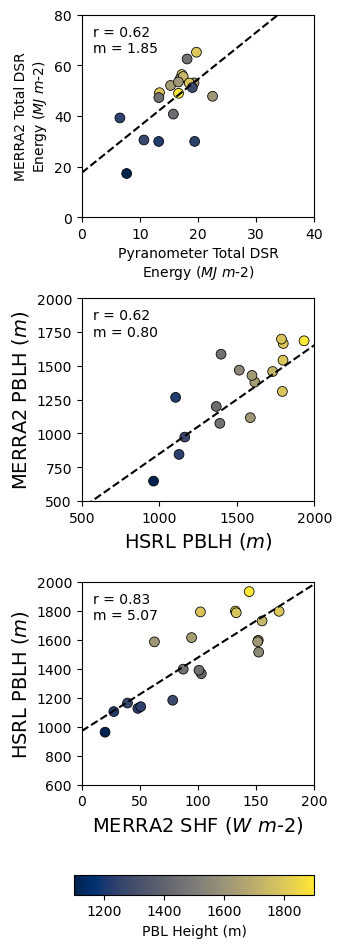

In [48]:
a4_dims = (3,10)
fig = plt.figure(figsize=a4_dims)
gs = fig.add_gridspec(3, 1,wspace=0.5,hspace=0.4)
###################################################
###################################################
x_new = np.linspace(0, 100, 1000)
sub_ = mfin2
sub_ = sub_[(sub_['SWNETSRF'] >= 0) & (sub_['SPN1_Total'] >= 0)]
tt = sub_
aa_x = np.array(tt['DSR_Energy'])
aa_y = np.array(tt['SW_Energy'])
x_a=aa_x
y_a=aa_y
xaa = x_a[~np.isnan(x_a)]
yaa = y_a[~np.isnan(y_a)]
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(x_a,y_a)
corr, _ = pearsonr(xaa,yaa)
###############################
###############################
norm = plt.Normalize(1100, 1900)
sm = plt.cm.ScalarMappable(cmap="cividis", norm=norm)
sm.set_array([])

ax = fig.add_subplot(gs[0, 0])
sns.scatterplot(x="DSR_Energy", y="SW_Energy", hue="pblh", facecolor='k', edgecolor='k', 
                      data=mfin2,marker="o" ,s=50, palette="cividis", legend=False)
plt.plot(x_new,slope_a*x_new + intercept_a,  color='black', linestyle='--')
plt.ylabel('MERRA2 Total DSR\nEnergy ($MJ$ $m$-2)', fontsize=10)
plt.xlabel('Pyranometer Total DSR\nEnergy ($MJ$ $m$-2)' , fontsize=10)
plt.xlim(0,40)
plt.ylim(0,80)
# Annotate slope and r directly on the plot
ax.text(0.05, 0.95, f"r = {corr:.2f}\nm = {slope_a:.2f}", 
        transform=ax.transAxes, fontsize=10, verticalalignment='top')

###################################################
x_new = np.linspace(0, 2000, 1000)
sub_ = mfin2
sub_ = sub_[(sub_['PBLH'] >= 0) & (sub_['pblh'] >= 0)]
tt = sub_
aa_x = np.array(tt['pblh'])
aa_y = np.array(tt['PBLH'])
x_a=aa_x
y_a=aa_y
xaa = x_a[~np.isnan(x_a)]
yaa = y_a[~np.isnan(y_a)]
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(x_a,y_a)
corr, _ = pearsonr(xaa,yaa)
###############################
ax = fig.add_subplot(gs[1, 0])
sns.scatterplot(x="pblh", y="PBLH", hue="pblh", facecolor='k', edgecolor='k', 
                      data=mfin2,marker="o" ,s=50, palette="cividis", legend=False)
plt.plot(x_new,slope_a*x_new + intercept_a,  color='black', linestyle='--')
plt.ylabel('MERRA2 PBLH ($m$)', fontsize=14)
plt.xlabel('HSRL PBLH ($m$)' , fontsize=14)
plt.xlim(500,2000)
plt.ylim(500,2000)
ax.text(0.05, 0.95, f"r = {corr:.2f}\nm = {slope_a:.2f}", 
        transform=ax.transAxes, fontsize=10, verticalalignment='top')
###################################################
x_new = np.linspace(0, 200, 1000)
sub_ = mfin2
sub_ = sub_[(sub_['SHF'] >= 0) & (sub_['pblh'] >= 0)]
tt = sub_
aa_x = np.array(tt['SHF'])
aa_y = np.array(tt['pblh'])
x_a=aa_x
y_a=aa_y
xaa = x_a[~np.isnan(x_a)]
yaa = y_a[~np.isnan(y_a)]
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(x_a,y_a)
corr, _ = pearsonr(xaa,yaa)
print(f'f) y = {slope_a:02}x + {intercept_a:02}')
print(f'f) r = {corr:02},pvalue:{_:02}')
print(f'f) {len(xaa)},{len(yaa)}')
###############################
ax = fig.add_subplot(gs[2, 0])
sns.scatterplot(x="SHF", y="pblh", hue="pblh", facecolor='k', edgecolor='k', 
                      data=mfin2,marker="o" ,s=50, palette="cividis", legend=False)
plt.plot(x_new,slope_a*x_new + intercept_a,  color='black', linestyle='--')
plt.ylabel('HSRL PBLH ($m$)', fontsize=14)
plt.xlabel('MERRA2 SHF ($W$ $m$-2)' , fontsize=14)
plt.xlim(0,200)
plt.ylim(600,2000)
ax.text(0.05, 0.95, f"r = {corr:.2f}\nm = {slope_a:.2f}", 
        transform=ax.transAxes, fontsize=10, verticalalignment='top')

ax_cbar = fig.add_axes([0.1, 0.0, 0.8, 0.02])
cbar = plt.colorbar(sm, cax=ax_cbar, orientation='horizontal')
cbar.set_label('PBL Height (m)')
output_filename = 'Fig9b_JGRPaper.png'
plt.savefig(output_filename, dpi= 300, bbox_inches='tight')


a) y = -479.4495062602067x + 809.9494098500062
a) r = -0.660080102077687,pvalue:0.0021013368450990286
a) 19 19
b) y = -0.6417994579235597x + 0.596037011057506
b) r = -0.7643570281455933,pvalue:0.00013870712031598603
b) 19,19
c) y = 0.64179945792356x + 0.40396298894249405
c) r = 0.7643570281455933,pvalue:0.00013870712031598603
c) 19,19


/Users/svisaga/anaconda3/envs/cmp/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/svisaga/anaconda3/envs/cmp/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/svisaga/anaconda3/envs/cmp/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


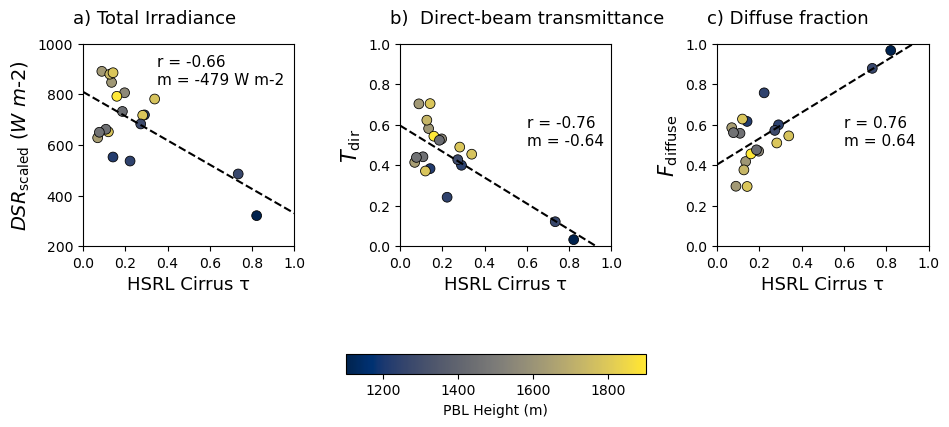

In [49]:
a4_dims = (15,10)
fig = plt.figure(figsize=a4_dims)
gs = fig.add_gridspec(3, 4,wspace=0.5,hspace=0.4)
###################################################
x_new = np.linspace(0, 1.0, 1000)
sub_ = mfin2
sub_ = sub_[(sub_['od_mean'] >= 0) & (sub_['F_down/cos(SZA)'] >= 0)]
tt = sub_
aa_x = np.array(tt['od_mean'])
aa_y = np.array(tt['F_down/cos(SZA)'])
x_a=aa_x
y_a=aa_y
xaa = x_a[~np.isnan(x_a)]
yaa = y_a[~np.isnan(y_a)]
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(x_a,y_a)
corr, _ = pearsonr(xaa,yaa)
print(f'a) y = {slope_a:02}x + {intercept_a:02}')
print(f'a) r = {corr:02},pvalue:{_:02}')
print(f'a) {len(xaa)} {len(yaa)}')
###############################

norm = plt.Normalize(1100, 1900)
sm = plt.cm.ScalarMappable(cmap="cividis", norm=norm)
sm.set_array([])

ax = fig.add_subplot(gs[0, 0])
sca = sns.scatterplot(x="od_mean", y="F_down/cos(SZA)", hue="pblh", facecolor='k', edgecolor='k', 
                      data=mfin2,marker="o" ,s=50, palette="cividis", legend=False, norm=norm)
plt.plot(x_new,slope_a*x_new + intercept_a,  color='black', linestyle='--')



plt.ylabel('$DSR_{\mathrm{scaled}}$ ($W$ $m$-2)', fontsize=14)
plt.xlabel('HSRL Cirrus ' + chr(964) , fontsize=13)
plt.xlim(0,1)
plt.ylim(200,1000)
ax.text(-0.05, 1.1,  'a) Total Irradiance', fontsize=13, color='k', transform=ax.transAxes)
ax.text(0.35, 0.8,  'r = -0.66\nm = -479 W m-2', fontsize=11, color='k', transform=ax.transAxes)

###################################################
x_new = np.linspace(0, 1.0, 1000)
sub_ = mfin2
sub_ = sub_[(sub_['od_mean'] >= 0) & (sub_['Tdir'] >= 0)]
tt = sub_
aa_x = np.array(tt['od_mean'])
aa_y = np.array(tt['Tdir'])
x_a=aa_x
y_a=aa_y
xaa = x_a[~np.isnan(x_a)]
yaa = y_a[~np.isnan(y_a)]
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(x_a,y_a)
corr, _ = pearsonr(xaa,yaa)
print(f'b) y = {slope_a:02}x + {intercept_a:02}')
print(f'b) r = {corr:02},pvalue:{_:02}')
print(f'b) {len(xaa)},{len(yaa)}')
###############################
ax = fig.add_subplot(gs[0, 1])
sns.scatterplot(x="od_mean", y="Tdir", hue="pblh", facecolor='k', edgecolor='k', 
                      data=mfin2,marker="o" ,s=50, palette="cividis", legend=False, norm=norm)

plt.plot(x_new,slope_a*x_new + intercept_a,  color='black', linestyle='--')
plt.ylabel('$T_{\mathrm{dir}}$', fontsize=15)
plt.xlabel('HSRL Cirrus ' + chr(964) , fontsize=13)
plt.xlim(0,1)
plt.ylim(0,1)
ax.text(-0.05, 1.1,  'b)  Direct-beam transmittance', fontsize=13, color='k', transform=ax.transAxes)
ax.text(0.6, 0.5,  'r = -0.76\nm = -0.64', fontsize=11, color='k', transform=ax.transAxes)
###################################################
x_new = np.linspace(0, 1.0, 1000)
sub_ = mfin2
sub_ = sub_[(sub_['od_mean'] >= 0) & (sub_['f_diff'] >= 0)]
tt = sub_
aa_x = np.array(tt['od_mean'])
aa_y = np.array(tt['f_diff'])
x_a=aa_x
y_a=aa_y
xaa = x_a[~np.isnan(x_a)]
yaa = y_a[~np.isnan(y_a)]
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(x_a,y_a)
corr, _ = pearsonr(xaa,yaa)
print(f'c) y = {slope_a:02}x + {intercept_a:02}')
print(f'c) r = {corr:02},pvalue:{_:02}')
print(f'c) {len(xaa)},{len(yaa)}')
###############################
ax = fig.add_subplot(gs[0, 2])
sns.scatterplot(x="od_mean", y="f_diff", hue="pblh", facecolor='k', edgecolor='k', 
                      data=mfin2,marker="o" ,s=50, palette="cividis", legend=False, norm=norm)

plt.plot(x_new,slope_a*x_new + intercept_a,  color='black', linestyle='--')
plt.ylabel('$F_{\mathrm{diffuse}}$', fontsize=15)
plt.xlabel('HSRL Cirrus ' + chr(964) , fontsize=13)
plt.xlim(0,1)
plt.ylim(0,1)
ax.text(-0.05, 1.1,  'c) Diffuse fraction', fontsize=13, color='k', transform=ax.transAxes)
ax.text(0.6, 0.5,  'r = 0.76\nm = 0.64', fontsize=11, color='k', transform=ax.transAxes)

ax_cbar = fig.add_axes([0.3, 0.55, 0.2, 0.02])
cbar = plt.colorbar(sm, cax=ax_cbar, orientation='horizontal')
cbar.set_label('PBL Height (m)')
output_filename = 'Figure5_JGRPaper.png'
plt.savefig(output_filename, dpi= 300, bbox_inches='tight')
